In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import final_pipeline_for_vm as fp
from sklearn import metrics

## Import the list of models that we generate

In [21]:
models = pd.read_csv('../output_files/results.csv')

In [22]:
models

,time_period,model_type,clf,parameters,threshold,auc-roc,precision,recall,f1_score
0,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1, 'min_samples_split': 2, 'm...",1.0,0.617162,0.000000,0.000000,NaN
1,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1, 'min_samples_split': 2, 'm...",2.0,0.617162,0.000000,0.000000,NaN
2,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1, 'min_samples_split': 2, 'm...",5.0,0.617162,0.000000,0.000000,NaN
3,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1, 'min_samples_split': 2, 'm...",10.0,0.617162,0.000000,0.000000,NaN
4,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1, 'min_samples_split': 2, 'm...",20.0,0.617162,0.000000,0.000000,NaN
5,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1, 'min_samples_split': 2, 'm...",30.0,0.617162,0.165147,0.246410,0.197756
6,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1, 'min_samples_split': 2, 'm...",50.0,0.617162,0.300820,0.748299,0.429129
7,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10, 'min_samples_split': 2, '...",1.0,0.745389,0.015385,0.000756,0.001441
8,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10, 'min_samples_split': 2, '...",2.0,0.745389,0.007634,0.000756,0.001376
9,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10, 'min_samples_split': 2, '...",5.0,0.745389,0.458967,0.114135,0.182809


## Find the model with the highest AUC-ROC, F1 score, and Precision at 10% level

In [6]:
models[models['threshold'] == 10.0].sort_values(by=['auc-roc'], ascending=False).iloc[0]['parameters']

"{'n_estimators': 1000, 'min_samples_split': 5, 'max_features': 'log2', 'n_jobs': -1, 'max_depth': 10}"

In [9]:
models[models['threshold'] == 10.0].sort_values(by=['f1_score'], ascending=False).iloc[0]['parameters']

"{'n_estimators': 1000, 'min_samples_split': 5, 'max_features': 'log2', 'n_jobs': -1, 'max_depth': 10}"

In [60]:
models[models['threshold'] == 10.0].sort_values(by=['precision'], ascending=False).iloc[0]

time_period                             train_test_data_period_2
model_type                                                    RF
clf            RandomForestClassifier(bootstrap=True, class_w...
parameters     {'n_estimators': 1000, 'min_samples_split': 5,...
threshold                                                     10
auc-roc                                                 0.890406
precision                                               0.674772
recall                                                  0.354067
f1_score                                                0.464435
Name: 5596, dtype: object

## Find the model with the highest AUC-ROC at each time period

In [11]:
models[models['time_period'] == 'train_test_data_period_0'].sort_values(by=['auc-roc'], ascending=False)#.iloc[0]['parameters']

,time_period,model_type,clf,parameters,threshold,auc-roc,precision,recall,f1_score
405,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 100, 'min_samples_split': 10,...",50.0,0.809440,0.352476,0.876795,0.502818
404,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 100, 'min_samples_split': 10,...",30.0,0.809440,0.449341,0.670446,0.538065
403,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 100, 'min_samples_split': 10,...",20.0,0.809440,0.490881,0.488284,0.489579
402,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 100, 'min_samples_split': 10,...",10.0,0.809440,0.537994,0.267574,0.357395
401,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 100, 'min_samples_split': 10,...",5.0,0.809440,0.559271,0.139078,0.222760
400,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 100, 'min_samples_split': 10,...",2.0,0.809440,0.503817,0.049887,0.090784
399,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 100, 'min_samples_split': 10,...",1.0,0.809440,0.569231,0.027967,0.053314
231,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 2,...",1.0,0.809177,0.615385,0.030234,0.057637
236,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 2,...",30.0,0.809177,0.445289,0.664399,0.533212
235,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 2,...",20.0,0.809177,0.494681,0.492063,0.493369


In [12]:
models[models['time_period'] == 'train_test_data_period_1'].sort_values(by=['auc-roc'], ascending=False)#.iloc[0]['parameters']

,time_period,model_type,clf,parameters,threshold,auc-roc,precision,recall,f1_score
3693,train_test_data_period_1,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10000, 'min_samples_split': 2...",20.0,0.830970,0.493921,0.496942,0.495427
3689,train_test_data_period_1,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10000, 'min_samples_split': 2...",1.0,0.830970,0.707692,0.035168,0.067007
3690,train_test_data_period_1,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10000, 'min_samples_split': 2...",2.0,0.830970,0.664122,0.066514,0.120917
3691,train_test_data_period_1,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10000, 'min_samples_split': 2...",5.0,0.830970,0.623100,0.156728,0.250458
3692,train_test_data_period_1,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10000, 'min_samples_split': 2...",10.0,0.830970,0.547112,0.275229,0.366226
3695,train_test_data_period_1,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10000, 'min_samples_split': 2...",50.0,0.830970,0.361592,0.909786,0.517504
3694,train_test_data_period_1,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10000, 'min_samples_split': 2...",30.0,0.830970,0.456940,0.689602,0.549665
3374,train_test_data_period_1,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10000, 'min_samples_split': 2...",1.0,0.830573,0.692308,0.034404,0.065550
3375,train_test_data_period_1,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10000, 'min_samples_split': 2...",2.0,0.830573,0.687023,0.068807,0.125087
3376,train_test_data_period_1,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 10000, 'min_samples_split': 2...",5.0,0.830573,0.632219,0.159021,0.254123


In [13]:
models[models['time_period'] == 'train_test_data_period_2'].sort_values(by=['auc-roc'], ascending=False)#.iloc[0]['parameters']

,time_period,model_type,clf,parameters,threshold,auc-roc,precision,recall,f1_score
5597,train_test_data_period_2,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",20.0,0.890406,0.592705,0.622010,0.607004
5596,train_test_data_period_2,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",10.0,0.890406,0.674772,0.354067,0.464435
5598,train_test_data_period_2,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",30.0,0.890406,0.506079,0.796651,0.618959
5599,train_test_data_period_2,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",50.0,0.890406,0.367973,0.965710,0.532893
5595,train_test_data_period_2,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",5.0,0.890406,0.729483,0.191388,0.303222
5594,train_test_data_period_2,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",2.0,0.890406,0.801527,0.083732,0.151625
5593,train_test_data_period_2,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",1.0,0.890406,0.861538,0.044657,0.084913
5628,train_test_data_period_2,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 10...",1.0,0.890277,0.830769,0.043062,0.081880
5629,train_test_data_period_2,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 10...",2.0,0.890277,0.824427,0.086124,0.155957
5631,train_test_data_period_2,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 10...",10.0,0.890277,0.671733,0.352472,0.462343


## Find the performance of the model we selected at different thresholds

In [14]:
models[models['parameters'] == "{'n_estimators': 1000, 'min_samples_split': 5, 'max_features': 'log2', 'n_jobs': -1, 'max_depth': 10}"]

,time_period,model_type,clf,parameters,threshold,auc-roc,precision,recall,f1_score
581,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",1.0,0.797211,0.584615,0.028723,0.054755
582,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",2.0,0.797211,0.473282,0.046863,0.085282
583,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",5.0,0.797211,0.480243,0.119426,0.191283
584,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",10.0,0.797211,0.477204,0.237339,0.317012
585,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",20.0,0.797211,0.465805,0.463341,0.464570
586,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",30.0,0.797211,0.434650,0.648526,0.520473
587,train_test_data_period_0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",50.0,0.797211,0.350957,0.873016,0.500650
3087,train_test_data_period_1,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",1.0,0.825774,0.723077,0.035933,0.068463
3088,train_test_data_period_1,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",2.0,0.825774,0.664122,0.066514,0.120917
3089,train_test_data_period_1,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'n_estimators': 1000, 'min_samples_split': 5,...",5.0,0.825774,0.589666,0.148318,0.237019


## Find the model with the highest AUC-ROC of each time period and each model type

In [16]:
models.groupby(['time_period', 'model_type'])['auc-roc'].max()

time_period               model_type
train_test_data_period_0  AB            0.790449
                          BG            0.750174
                          DT            0.759870
                          GB            0.807299
                          KNN           0.774051
                          LR            0.778553
                          NB            0.742731
                          RF            0.809440
                          SVM           0.783455
train_test_data_period_1  AB            0.807285
                          BG            0.807031
                          DT            0.765393
                          GB            0.820301
                          KNN           0.796796
                          LR            0.801805
                          NB            0.747860
                          RF            0.830970
                          SVM           0.806298
train_test_data_period_2  AB            0.850107
                          BG    

## Apply the model we select to the training and testing data

In [23]:
	pred_vars = ['population', 'poverty-rate',
	   'renter-occupied-households', 'pct-renter-occupied',
	   'median-gross-rent', 'median-household-income', 'median-property-value',
	   'rent-burden', 'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind',
	   'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other', 'low-flag',
	   'avg_household_size_owner',
	   'avg_household_size_renter', 'less_hs_rate', 'hs_grad_rate',
	   'some_college_rate', 'bachelors_rate', 'Mean_hours_worked',
	   'Primary Type', 'redlined', 'crime_rate']
	dep_var = 'if_top_10'

In [24]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [25]:
X_train = train[pred_vars]
y_train = train[dep_var]
X_test = test[pred_vars]
y_test = test[dep_var]

In [26]:
model = RandomForestClassifier(max_depth=10, min_samples_split=5, max_features='log2', n_estimators=1000, n_jobs=-1)

In [27]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
y_probs = model.predict_proba(X_test)[:,1]

<Figure size 432x288 with 0 Axes>

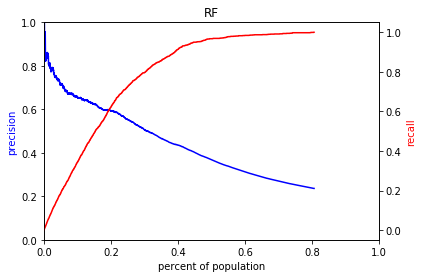

In [29]:
fp.plot_precision_recall_n(y_test, y_probs, 'RF')

## Find the top 10% block groups to be intervened

In [38]:
resultdf = pd.DataFrame()
resultdf['index_num'] = y_test.index
resultdf['prob'] = y_probs
sorteddf = resultdf.sort_values(by='prob', ascending=False)
top10pct = sorteddf.head(int(len(sorteddf)*(10/100)))
top10pct.dtypes

index_num      int64
prob         float64
dtype: object

In [52]:
top10pct[['index_num']].head(20)

,index_num
426,426
428,428
427,427
3289,3289
3290,3290
5266,5266
3288,3288
5265,5265
5659,5659
6432,6432


In [47]:
test.iloc[[427]]

,Unnamed: 0,GEOID,Date,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,Mean_hours_worked,Primary Type,redlined,crime_rate,less_hs_rate,hs_grad_rate,some_college_rate,bachelors_rate,if_top_10,index
427,2429,170310314004,2015,147.0,0.0,2.0,0.0,0,0,0,...,41.1,1,0.0,0.836735,1.517007,2.217687,3.530612,12.768707,1,427


In [48]:
test.iloc[[428]]

,Unnamed: 0,GEOID,Date,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,Mean_hours_worked,Primary Type,redlined,crime_rate,less_hs_rate,hs_grad_rate,some_college_rate,bachelors_rate,if_top_10,index
428,2430,170310314004,2016,147.0,0.0,2.0,0.0,0,0,0,...,40.3,15,0.0,1.034014,1.62585,2.068027,3.37415,12.380952,1,428


In [49]:
test.iloc[[426]]

,Unnamed: 0,GEOID,Date,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,Mean_hours_worked,Primary Type,redlined,crime_rate,less_hs_rate,hs_grad_rate,some_college_rate,bachelors_rate,if_top_10,index
426,2428,170310314004,2014,147.0,0.0,2.0,0.0,0,0,0,...,40.5,15,0.0,0.843537,1.537415,2.455782,3.714286,12.285714,1,426


In [50]:
test.iloc[[3289]]

,Unnamed: 0,GEOID,Date,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,Mean_hours_worked,Primary Type,redlined,crime_rate,less_hs_rate,hs_grad_rate,some_college_rate,bachelors_rate,if_top_10,index
3289,18647,170313511002,2015,29.0,0.0,13.0,100.0,0,0,0,...,32.8,15,1.0,2.551724,6.413793,8.793103,11.103448,3.241379,1,3289


In [53]:
test.iloc[[3290]]

,Unnamed: 0,GEOID,Date,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,Mean_hours_worked,Primary Type,redlined,crime_rate,less_hs_rate,hs_grad_rate,some_college_rate,bachelors_rate,if_top_10,index
3290,18648,170313511002,2016,29.0,0.0,13.0,100.0,0,0,0,...,30.2,15,1.0,3.137931,7.103448,9.275862,12.37931,2.931034,1,3290


In [55]:
test.iloc[[3288]]

,Unnamed: 0,GEOID,Date,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,Mean_hours_worked,Primary Type,redlined,crime_rate,less_hs_rate,hs_grad_rate,some_college_rate,bachelors_rate,if_top_10,index
3288,18646,170313511002,2014,29.0,0.0,13.0,100.0,0,0,0,...,32.7,15,1.0,2.655172,5.862069,10.896552,9.655172,1.37931,1,3288


In [59]:
test.iloc[[2846]]

,Unnamed: 0,GEOID,Date,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,Mean_hours_worked,Primary Type,redlined,crime_rate,less_hs_rate,hs_grad_rate,some_college_rate,bachelors_rate,if_top_10,index
2846,16132,170312518004,2016,412.0,49.41,195.0,83.33,1,0,0,...,36.9,1,0.0,0.427184,1.81068,2.740291,1.519417,0.322816,1,2846


In [61]:
final_block_groups = test[test.index.isin(top10pct['index_num'])]

In [62]:
final_block_groups.to_csv('output_files/block_groups_intervene.csv', index=False)

## Find the feature importance

Feature ranking:
1. feature 9 (0.128631)
2. feature 8 (0.084304)
3. feature 26 (0.078108)
4. feature 2 (0.074142)
5. feature 10 (0.064062)
6. feature 3 (0.057911)
7. feature 21 (0.049171)
8. feature 12 (0.048704)
9. feature 20 (0.045457)
10. feature 18 (0.040336)
11. feature 0 (0.039888)
12. feature 22 (0.038573)
13. feature 19 (0.037591)
14. feature 23 (0.035536)
15. feature 7 (0.035394)
16. feature 17 (0.035344)
17. feature 1 (0.034869)
18. feature 24 (0.018910)
19. feature 14 (0.016228)
20. feature 4 (0.008054)
21. feature 15 (0.006888)
22. feature 11 (0.006383)
23. feature 5 (0.006231)
24. feature 25 (0.006117)
25. feature 13 (0.001611)
26. feature 6 (0.001558)
27. feature 16 (0.000000)


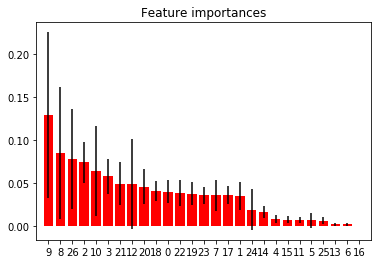

In [26]:
fp.get_feature_importance(X_train, model)

In [18]:
pred_vars[22]

'bachelors_rate'

In [28]:
pred_vars[8]

'pct-white'

In [29]:
pred_vars[26]

'crime_rate'

In [30]:
pred_vars[2]

'renter-occupied-households'

In [31]:
pred_vars[10]

'pct-hispanic'

## Get the to-be-intervened block group numbers

In [69]:
bgset = set(final_block_groups['GEOID'])
bgset

{170310101001,
 170310314004,
 170310810001,
 170310812021,
 170312306001,
 170312312003,
 170312315002,
 170312315003,
 170312315004,
 170312315006,
 170312505002,
 170312505003,
 170312507001,
 170312507002,
 170312507003,
 170312507004,
 170312511002,
 170312514002,
 170312514003,
 170312515002,
 170312515003,
 170312515004,
 170312516002,
 170312518001,
 170312518002,
 170312518003,
 170312518004,
 170312518005,
 170312519001,
 170312519002,
 170312519003,
 170312519004,
 170312520001,
 170312520002,
 170312520003,
 170312521022,
 170312521023,
 170312521024,
 170312522011,
 170312522021,
 170312522022,
 170312522024,
 170312522025,
 170312606001,
 170312607001,
 170312608001,
 170312705001,
 170312909001,
 170312909002,
 170312909003,
 170312909004,
 170312922001,
 170312924001,
 170312924002,
 170313302002,
 170313511002,
 170313818001,
 170313907001,
 170314008001,
 170314207002,
 170314207003,
 170314207005,
 170314208001,
 170314208002,
 170314301011,
 170314301012,
 170314301

In [68]:
len(bgset)

272

## Compare our results with the results of random guessing

In [32]:
window = train[train['Date'].isin([2011, 2012, 2013])]

In [33]:
window.head()

,Unnamed: 0,GEOID,Date,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,Total_Bachelors,Mean_hours_worked,Primary Type,redlined,crime_rate,less_hs_rate,hs_grad_rate,some_college_rate,bachelors_rate,if_top_10
6,11,170310101001,2011,435.0,18.92,153.0,67.23,0,0,0,...,661.0,37.7,1,0.0,0.245977,1.050575,1.655172,2.416092,1.519540,1
7,12,170310101001,2012,435.0,18.92,156.0,67.23,0,0,0,...,598.0,36.8,1,0.0,0.252874,0.917241,1.763218,2.485057,1.374713,1
8,13,170310101001,2013,435.0,18.92,159.0,67.23,0,0,0,...,670.0,37.3,1,0.0,0.213793,0.675862,1.650575,2.455172,1.540230,1
15,28,170310101002,2011,1496.0,28.28,881.0,92.78,0,0,0,...,661.0,37.7,1,0.0,0.336230,0.305481,0.481283,0.702540,0.441845,0
16,29,170310101002,2012,1496.0,28.28,870.0,92.78,0,0,0,...,598.0,36.8,1,0.0,0.324198,0.266711,0.512701,0.722594,0.399733,0


In [34]:
X = window[['GEOID', 'if_top_10']].drop_duplicates()


Y = test[['GEOID', 'if_top_10']].drop_duplicates()



In [35]:
metrics.roc_auc_score(Y['if_top_10'], X['if_top_10'])

0.7319011595327384